# Health Insurance Claims Exploratory Data Analysis
### Objective

The goal of this project is to conduct an in-depth exploratory data analysis on a health insurance dataset. Specifically, this analysis will:
- Investigate the distribution and relationships of key variables including age, gender, BMI, number of children, and smoking status with individual insurance costs.
- Develop and interpret linear regression models to quantify the impact of these factors on insurance charges.
- Assess how specific attributes moderate the relationship between age and insurance costs.
- Identify significant predictors of health insurance premiums to provide a foundational understanding for pricing models or individual cost management.

In [45]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
insurance_csv = pd.read_csv("insurance.csv")

### 1. Data Validation and Cleaning
After reading the dataset into my environment, I like to profile the dataset to ensure it is complete and that the values are consistent with the variables I will examine downstream.

In [4]:
print("INITIAL DATASET OVERVIEW")
print("\nFirst 5 rows of the dataset:")
print(insurance_csv.head())
print("\nDataset shape:")
print(f"Rows: {insurance_csv.shape[0]}")
print(f"Columns: {insurance_csv.shape[1]}")

INITIAL DATASET OVERVIEW

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset shape:
Rows: 1338
Columns: 7


In [5]:
print("DATA QUALITY CHECKS")
print("\nData types and missing values:")
print(insurance_csv.info())

print("\nMissing values in each column:")
missing_values = insurance_csv.isnull().sum()
if missing_values.sum() == 0:
    print("None")
else:
    print(missing_values[missing_values > 0])

DATA QUALITY CHECKS

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing values in each column:
None


In [6]:
print("DUPLICATE VALUES CHECK")
duplicated = insurance_csv.duplicated()
print(f"\nDuplicated rows in the dataset: {duplicated.sum()}")
if not duplicated.any():
    print("None")
else:
    print(insurance_csv[duplicated])

DUPLICATE VALUES CHECK

Duplicated rows in the dataset: 1
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [7]:
insurance_csv = insurance_csv.drop_duplicates()
print(f"Rows after removing duplicates: {insurance_csv.shape[0]}")

Rows after removing duplicates: 1337


In [8]:
insurance_csv.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


### 2. Identifying Relationships Between Variables
Now that we have verified that our dataset has the correct data types and that NULL and duplicate entries have been dealt with, we can move on to the exploratory data analysis (EDA).
To begin the EDA, we will look for trends or relationships between different variables within our dataset. Pairplots plot pairwise comparisons of each quantitative variable in our dataset, allowing us to easily visualize relationships between pairs.

<Figure size 1200x1000 with 0 Axes>

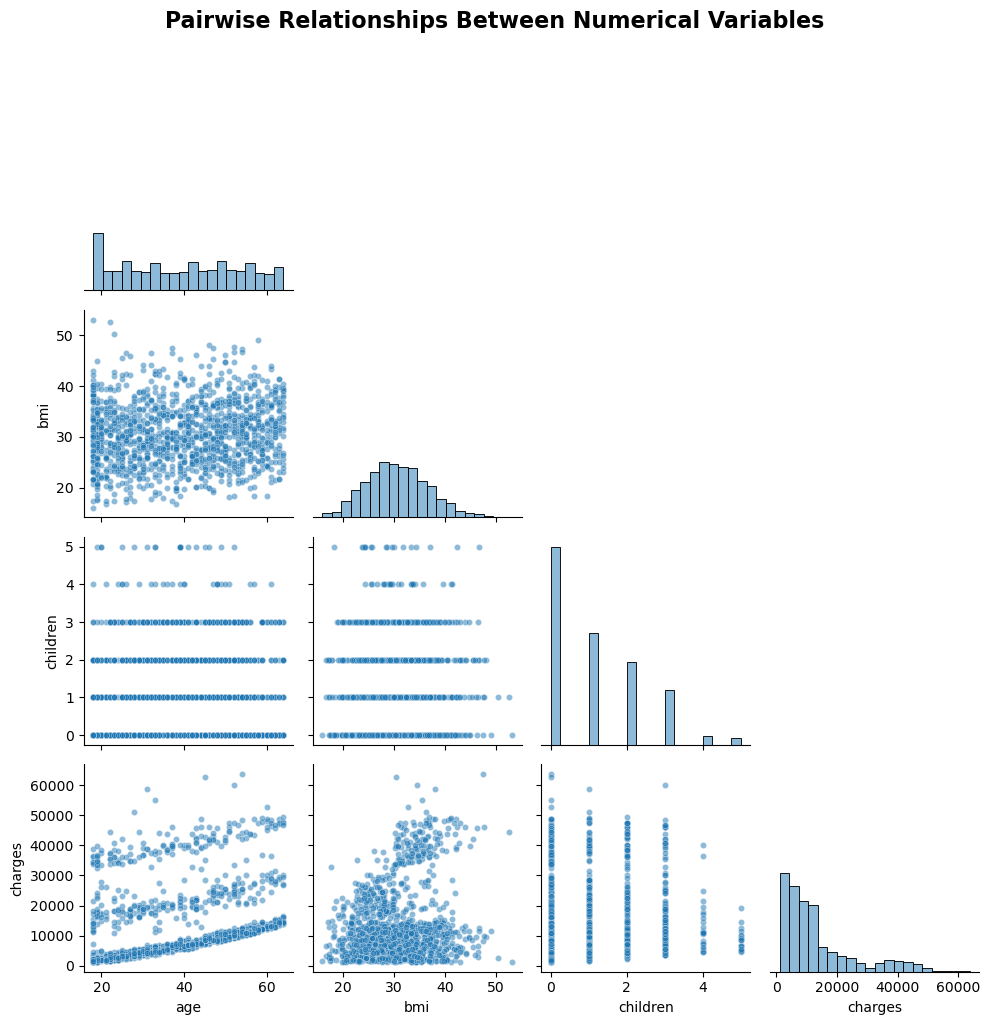

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(12, 10))
g = sns.pairplot(insurance_csv, diag_kind='hist', corner=True, plot_kws={'alpha':0.5, 's':20}, diag_kws={'bins':20, 'alpha':0.5})
g.fig.suptitle('Pairwise Relationships Between Numerical Variables', fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()
plt.clf()

Along the slope of the plot, we can see the distribution of each of our quantitative variables. 
- Age has a mostly uniform distribution, with a spike in the youngest bin (18-20 years).
- BMI has a normal distribution with a mean of 30.6.
- Children has a right-skewed distribution, with the average person within this dataset having 1 child.
- Charges, or insurance cost, also has a right-skewed distribution.

When examining the relationships between different variables, there seems to be a positive correlation between age and insurance cost.

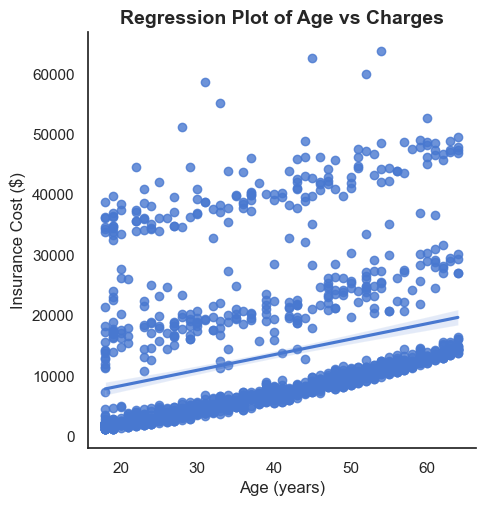

Slope: 257.23
Intercept: $3190.02
Regression Equation: Charges = 3190.02 + 257.23 × Age
Correlation Coefficient (r): 0.298
R-squared (R²): 0.089
Standard Error: 22.53
P-value: 6.98e-29
Statistical Significance: Yes (p < 0.001)


<Figure size 640x480 with 0 Axes>

In [20]:
# Linear Regression
age_model = LinearRegression()
age_model.fit(insurance_csv[['age']], insurance_csv['charges'])
age_slope = age_model.coef_[0]
age_intercept = age_model.intercept_
r_squared = age_model.score(insurance_csv[['age']], insurance_csv['charges'])

linregress_results = stats.linregress(insurance_csv['age'], insurance_csv['charges'])
p_value = linregress_results.pvalue
std_error = linregress_results.stderr
correlation = linregress_results.rvalue

sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True)
plt.title('Regression Plot of Age vs Charges', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()

print(f"Slope: {age_slope:.2f}")
print(f"Intercept: ${age_intercept:.2f}")
print(f"Regression Equation: Charges = {age_intercept:.2f} + {age_slope:.2f} × Age")
print(f"Correlation Coefficient (r): {correlation:.3f}")
print(f"R-squared (R²): {r_squared:.3f}")
print(f"Standard Error: {std_error:.2f}")
print(f"P-value: {p_value:.2e}")
print(f"Statistical Significance: {'Yes (p < 0.001)' if p_value < 0.001 else 'No'}")

**Key Insights from Age vs Cost Analysis**

Above I plotted a linear regression to examine the relationship between the age of the insured and their insurance costs. For our population, the insurance costs increase at a rate of $257.23 per year with a standard error of +/- $22.53. The correlation coefficient (r) of 0.298 shows that there is a weak positive correlation between insurance costs and progressing age. Additionally, the r-square suggests that age only explains 8.9% of the variation in insurance costs. 

These results suggest that we should look deeper for moderating variables that influence the relationship between age and insurance costs.

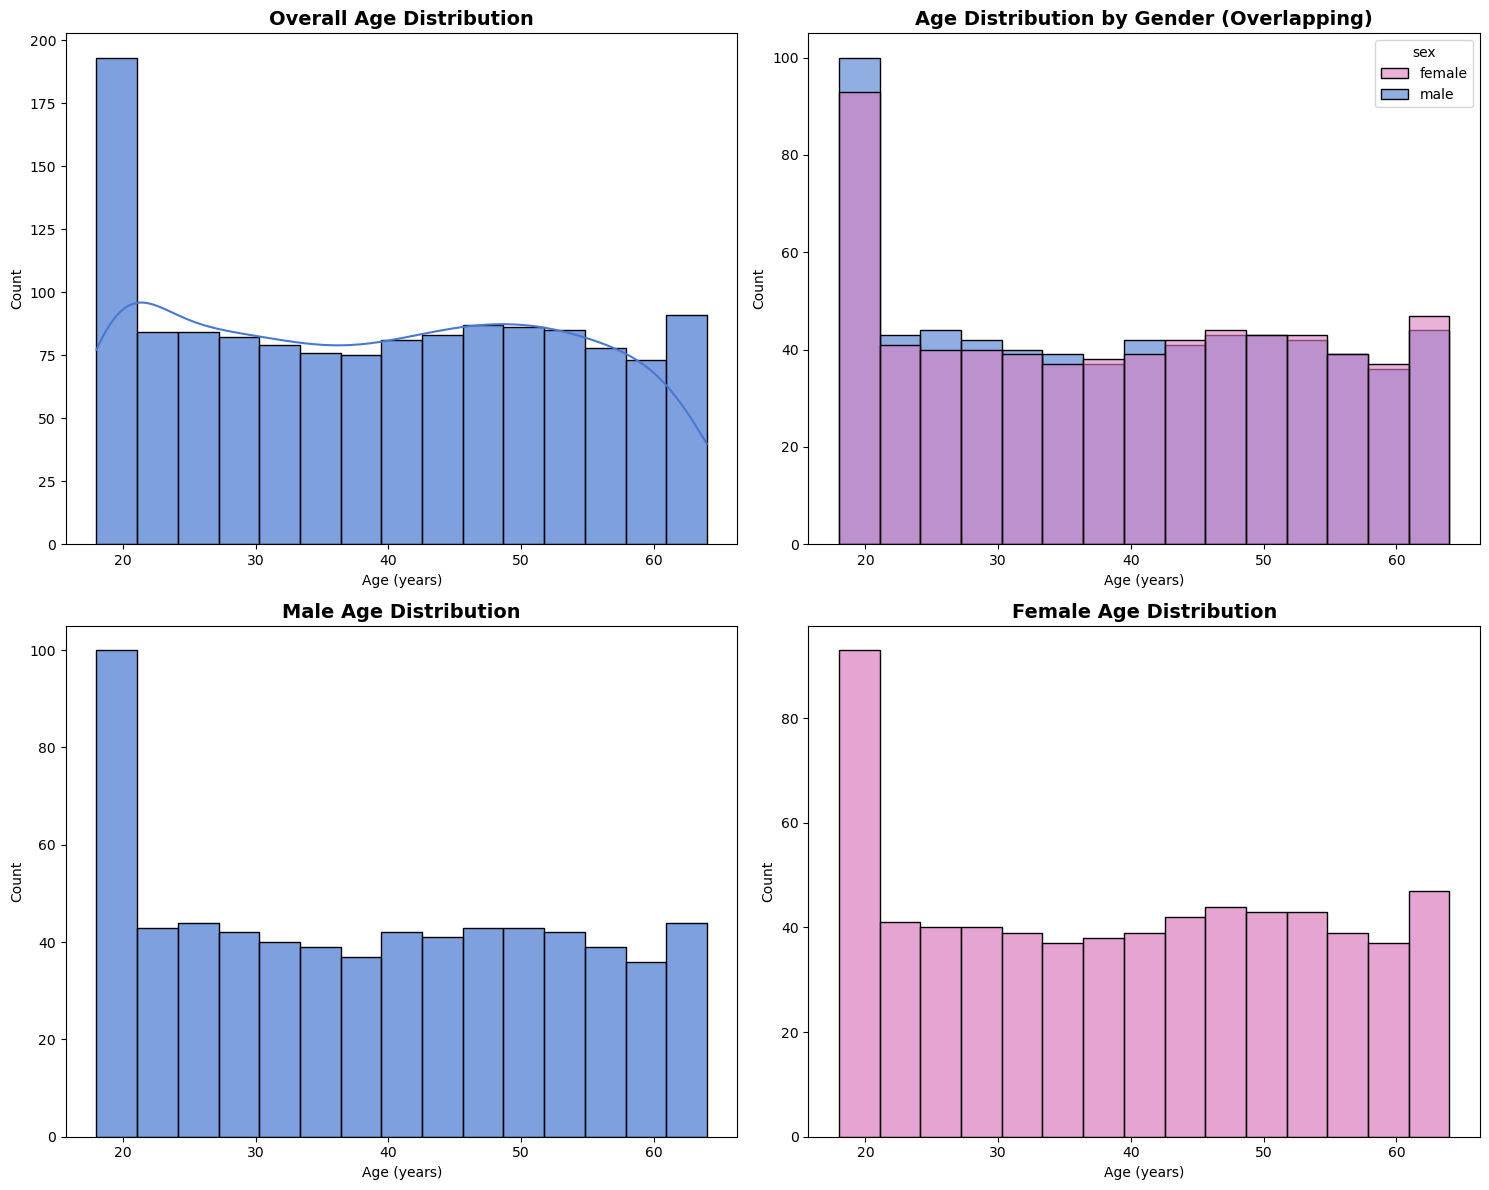

In [ ]:
# EXAMINING THE EFFECT OF GENDER ON THE RELATIONSHIP BETWEEN AGE AND INSURANCE COST

# Set colors
sns.set_palette('muted')
muted_colors = sns.color_palette('muted')

# Create the figure layout (2x2)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Overall age distribution
sns.histplot(data=insurance_csv, x='age', bins=15, kde=True, alpha=0.7, color=muted_colors[0], ax=axes[0,0])
axes[0,0].set_title('Overall Age Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Age (years)')
axes[0,0].set_ylabel('Count')

# Age distribution by gender - overlapping
sns.histplot(data=insurance_csv, x='age', hue='sex', bins=15, alpha=0.6, 
             palette={'male': muted_colors[0], 'female': muted_colors[6]}, ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Gender (Overlapping)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Age (years)')
axes[0,1].set_ylabel('Count')

# Age distribution by gender - separate facets
sns.histplot(data=insurance_csv[insurance_csv['sex'] == 'male'], x='age', 
             bins=15, color=muted_colors[0], alpha=0.7, ax=axes[1,0])
axes[1,0].set_title('Male Age Distribution', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Age (years)')
axes[1,0].set_ylabel('Count')

sns.histplot(data=insurance_csv[insurance_csv['sex'] == 'female'], x='age', 
             bins=15, color=muted_colors[6], alpha=0.7, ax=axes[1,1])
axes[1,1].set_title('Female Age Distribution', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Age (years)')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\Daelin\AppData\Local\Temp\ipykernel_25960\1451306175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=insurance_csv, order=['male', 'female'],


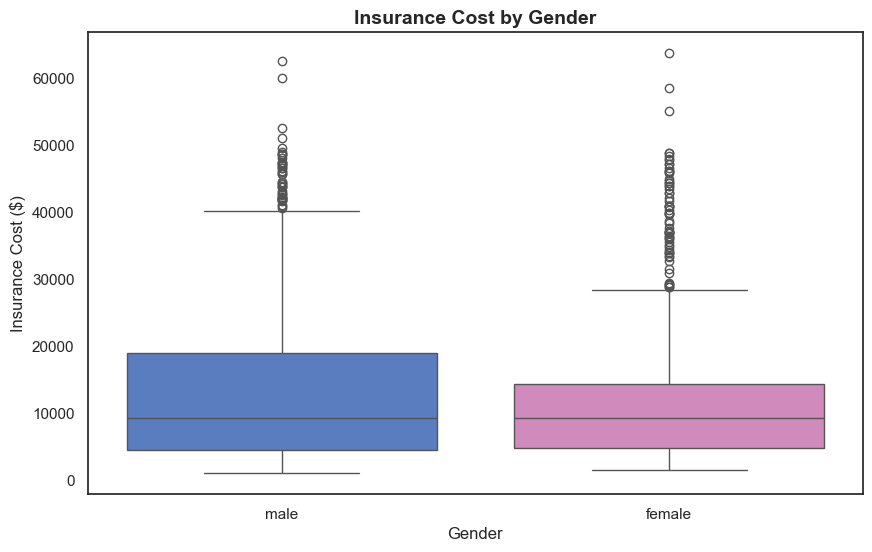

T-test for Insurance Cost Difference Based on Gender
Median cost for males: $9377.90
Median cost for females: $9412.96
Mean Difference (male - female): $1405.42
T-statistic: 2.124
p-value: 0.0338


In [57]:
# Plot gender against insurance cost
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=insurance_csv, order=['male', 'female'], 
            palette={'male':muted_colors[0], 'female':muted_colors[6]})
plt.title('Insurance Cost by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Insurance Cost ($)')
plt.show()

male_median_charges = insurance_csv[insurance_csv['sex'] == 'male']['charges'].median()
female_median_charges = insurance_csv[insurance_csv['sex'] == 'female']['charges'].median()

# Run t-test
male_charges = insurance_csv[insurance_csv['sex'] == 'male']['charges']
female_charges = insurance_csv[insurance_csv['sex'] == 'female']['charges']

t_stat, t_pvalue = ttest_ind(male_charges, female_charges)
mean_diff = male_charges.mean() - female_charges.mean()

print("T-test for Insurance Cost Difference Based on Gender")
print(f"Median cost for males: ${male_median_charges:.2f}")
print(f"Median cost for females: ${female_median_charges:.2f}")
print(f"Mean Difference (male - female): ${mean_diff:.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"p-value: {t_pvalue:.4f}")

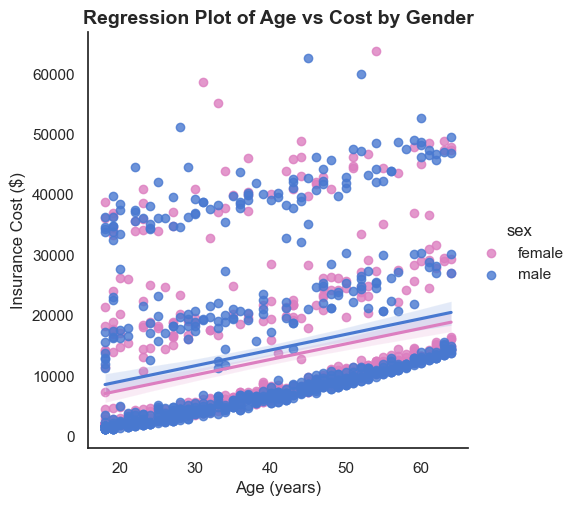

            Metric      Male    Female
0      Sample Size       675       662
1   Slope ($/year)    259.61    257.01
2    Intercept ($)   3863.99   2416.85
3        R-squared     0.079     0.105
4  Correlation (r)     0.281     0.325
5          p-value  1.03e-13  1.05e-17
6   Standard Error     34.18     29.15


<Figure size 640x480 with 0 Axes>

In [ ]:
# Gender-specific regression analysis

# Separate data by sex
male_data = insurance_csv[insurance_csv['sex'] == 'male'].copy()
female_data = insurance_csv[insurance_csv['sex'] == 'female'].copy()

# Fit regression models
male_model = LinearRegression()
female_model = LinearRegression()

male_model.fit(male_data[['age']], male_data['charges'])
female_model.fit(female_data[['age']], female_data['charges'])

male_stats = stats.linregress(male_data['age'], male_data['charges'])
female_stats = stats.linregress(female_data['age'], female_data['charges'])

# Plot
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='sex', palette={'male': muted_colors[0], 'female': muted_colors[6]})
plt.title('Regression Plot of Age vs Cost by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()

# Results table
gender_results = {
    'Metric':['Sample Size', 'Slope ($/year)', 'Intercept ($)', 'R-squared', 'Correlation (r)', 'p-value', 'Standard Error'],
    'Male': [
        len(male_data),
        f"{male_stats.slope:.2f}",
        f"{male_stats.intercept:.2f}",
        f"{male_stats.rvalue**2:.3f}",
        f"{male_stats.rvalue:.3f}",
        f"{male_stats.pvalue:.2e}",
        f"{male_stats.stderr:.2f}"
    ],
    'Female': [
        len(female_data),
        f"{female_stats.slope:.2f}",
        f"{female_stats.intercept:.2f}",
        f"{female_stats.rvalue**2:.3f}",
        f"{female_stats.rvalue:.3f}",
        f"{female_stats.pvalue:.2e}",
        f"{female_stats.stderr:.2f}"
    ]
}

gender_results_df = pd.DataFrame(gender_results)
print(gender_results_df)

**Key Insights from Analyzing Age v Cost by Gender**

Our dataset is fairly balanced between males (50.5%) and females (49.5%) across all age groups. While males have a higher insurance cost by an average of $1,405.42, the rate at which insurance costs increase with age is no different between males and females. Additionally, age only explains 7.9% and 10.5% of the variance in insurance cost in males and females, respectively. Although gender seems to have an effect on baseline insurance costs, and age influences the progression of costs, much of the variability in insurance costs remains unexplained by age and gender alone.

<Figure size 1000x800 with 0 Axes>

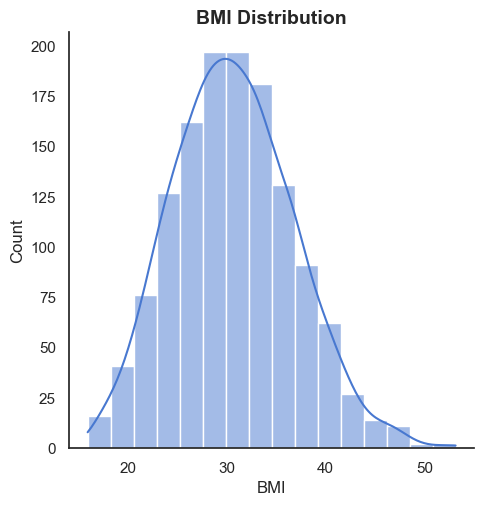

<Figure size 640x480 with 0 Axes>

In [ ]:
# EXAMINING THE EFFECT OF BMI ON THE RELATIONSHIP BETWEEN AGE AND INSURANCE COST

# Plot BMI distribution using a histogram
plt.figure(figsize = (10, 8))
sns.set_theme(style="white", palette="muted", color_codes=True)
sns.displot(insurance_csv['bmi'], bins = 16, color = 'b', kde = True)
plt.title("BMI Distribution", fontsize=14, fontweight='bold')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()
plt.clf()

<Figure size 1000x800 with 0 Axes>

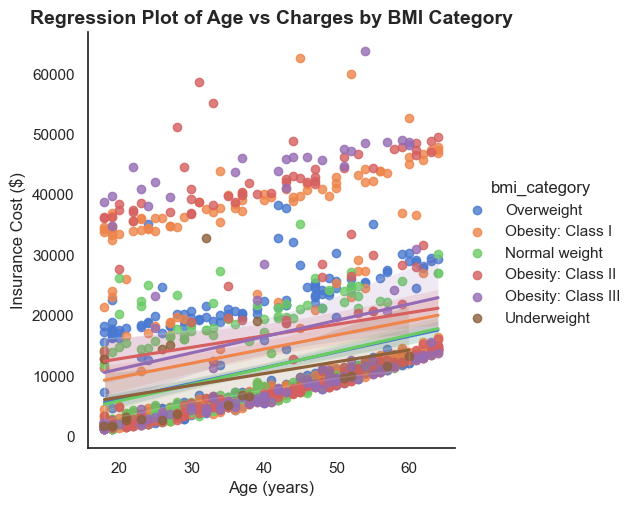

         BMI Category  Sample Size       Slope    Intercept        R²  \
0         Underweight           20  195.222558  2536.750834  0.115750   
1       Normal weight          222  272.322987   372.243292  0.245699   
2          Overweight          374  259.930961   921.299282  0.189524   
3    Obesity: Class I          386  233.797013  5046.498941  0.061877   
4   Obesity: Class II          222  190.478524  8982.762788  0.034271   
5  Obesity: Class III          113  269.042829  5699.844713  0.051332   

          r             p  
0  0.340221  1.421732e-01  
1  0.495681  3.623433e-15  
2  0.435343  9.963691e-19  
3  0.248751  7.446150e-07  
4  0.185124  5.663254e-03  
5  0.226567  1.581633e-02  


<Figure size 640x480 with 0 Axes>

In [44]:
bmi_categories = ['Underweight', 'Normal weight', 'Overweight', 'Obesity: Class I', 'Obesity: Class II', 'Obesity: Class III']
bmi_category = []
for i in insurance_csv['bmi']:
    if i < 18.5:
        bmi_category.append('Underweight')
    elif 18.5 <= i < 24.9:
        bmi_category.append('Normal weight')
    elif 25 <= i < 29.9:
        bmi_category.append('Overweight')
    elif 30 <= i < 34.9:
        bmi_category.append('Obesity: Class I')
    elif 35 <= i < 39.9:
        bmi_category.append('Obesity: Class II')
    else:
        bmi_category.append('Obesity: Class III')
insurance_csv['bmi_category'] = bmi_category

results = []
for category in bmi_categories:
    data = insurance_csv[insurance_csv['bmi_category'] == category]
    if len(data) > 0:
        model = LinearRegression()
        model.fit(data[['age']], data['charges'])
        # r_sq = model.score(data[['age']], data['charges'])
        stat = stats.linregress(data['age'], data['charges'])
        slope = stat.slope
        intercept = stat.intercept
        r_sq = stat.rvalue**2
        r = stat.rvalue
        p_value = stat.pvalue
        results.append({
            'BMI Category': category,
            'Sample Size': len(data),
            'Slope': slope,
            'Intercept': intercept,
            'R²': r_sq,
            'r': r,
            'p': p_value
        })

bmi_df = pd.DataFrame(results)

plt.figure(figsize=(10, 8))
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='bmi_category')
plt.title('Regression Plot of Age vs Charges by BMI Category', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()

print(bmi_df)

**Key Insights from Analyzing Age v Cost by BMI**

There is a large amount of variation in the relationship between age and insurance cost across BMI categories. Baseline insurance costs, as reflected by the intercept, seem to increase with higher BMI categories. When examining the impact age has on insurance cost within different BMI groups, the "normal weight" group had the steepest slope. One way to interpret this would be that age might affect other BMI groups less because of a higher baseline cost. However, age seems to best account for the cost variation within the "normal weight" BMI group. As we move into other BMI categories, the r-square drops significantly, suggesting that age alone is a poor predictor of insurance cost variation.

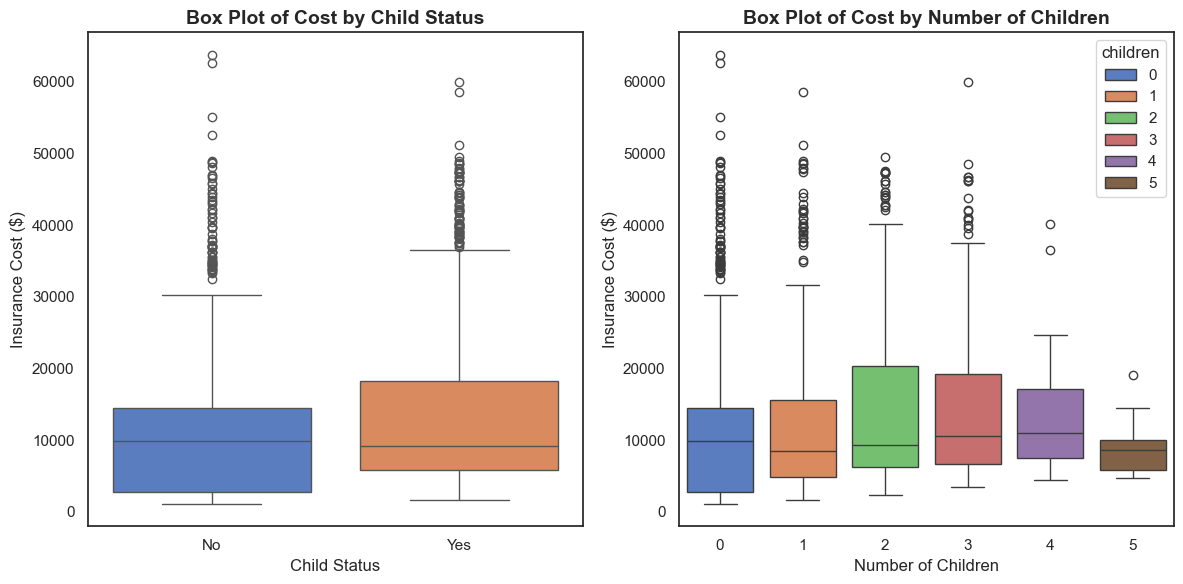

T-test for Insurance Cost Differences Based on Child Status
Mean Difference (children - none): $1565.25
T-statistic: -2.343
p-value: 0.0193


In [58]:
# EXAMINING THE EFFECT OF CHILDREN ON THE RELATIONSHIP BETWEEN AGE AND INSURANCE COST

# Simplify the children column to Yes/No
insurance_csv['children_yn'] = insurance_csv['children'].apply(lambda x: 'Yes' if x >= 1 else 'No')

# Analyze the effect of children on insurance cost
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='children_yn', y='charges', data=insurance_csv, palette='muted', hue=insurance_csv['children_yn'], ax=axes[0])
axes[0].set_title('Box Plot of Cost by Child Status', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Insurance Cost ($)')
axes[0].set_xlabel('Child Status')

# Run t-test on insurance costs between those with and without children
no_child_charges = insurance_csv[insurance_csv['children_yn'] == 'No']['charges']
yes_child_charges = insurance_csv[insurance_csv['children_yn'] == 'Yes']['charges']

t_stat, t_pvalue = ttest_ind(no_child_charges, yes_child_charges)
mean_diff = yes_child_charges.mean() - no_child_charges.mean()

# Analyze the effect the number of children has on insurance cost
sns.boxplot(x='children', y='charges', data=insurance_csv, palette='muted', hue=insurance_csv['children'], ax=axes[1])
axes[1].set_title('Box Plot of Cost by Number of Children', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Insurance Cost ($)')
axes[1].set_xlabel('Number of Children')

plt.tight_layout()
plt.show()

print(f"T-test for Insurance Cost Differences Based on Child Status")
print(f"Mean Difference (children - none): ${mean_diff:.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"p-value: {t_pvalue:.4f}")

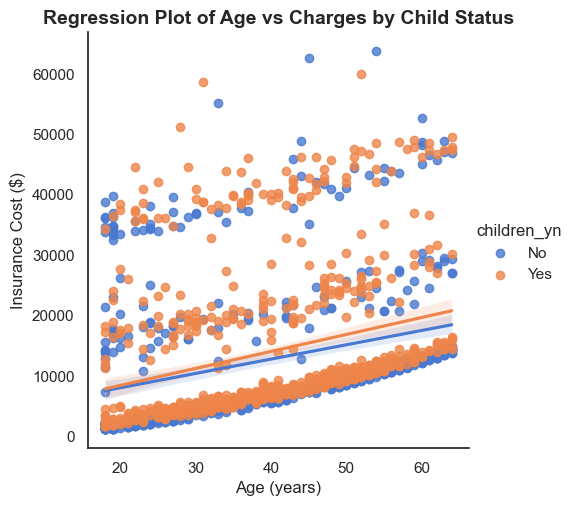

            Metric No Children Yes Children
0      Sample Size         573          764
1   Slope ($/year)      237.16       280.95
2    Intercept ($)     3259.29      2773.64
3        R-squared       0.105        0.076
4  Correlation (r)       0.324        0.276
5          p-value    1.79e-15     7.87e-15
6   Standard Error       28.98        35.43


<Figure size 640x480 with 0 Axes>

In [25]:
# Child-status regression analysis
# Divide data by child status
yes_child_data = insurance_csv[insurance_csv['children_yn'] == 'Yes'].copy()
no_child_data = insurance_csv[insurance_csv['children_yn'] == 'No'].copy()

# Fit regression
yes_child_model = LinearRegression()
no_child_model = LinearRegression()

yes_child_model.fit(yes_child_data[['age']], yes_child_data['charges'])
no_child_model.fit(no_child_data[['age']], no_child_data['charges'])

yes_child_stats = stats.linregress(yes_child_data['age'], yes_child_data['charges'])
no_child_stats = stats.linregress(no_child_data['age'], no_child_data['charges'])

# Plot
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='children_yn')
plt.title('Regression Plot of Age vs Charges by Child Status', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()

# Results
child_results = {
    'Metric': ['Sample Size', 'Slope ($/year)', 'Intercept ($)', 'R-squared', 'Correlation (r)', 'p-value', 'Standard Error'],
    'No Children': [
        len(no_child_data),
        f"{no_child_stats.slope:.2f}",
        f"{no_child_stats.intercept:.2f}",
        f"{no_child_stats.rvalue**2:.3f}",
        f"{no_child_stats.rvalue:.3f}",
        f"{no_child_stats.pvalue:.2e}",
        f"{no_child_stats.stderr:.2f}"
    ],
    'Yes Children': [
        len(yes_child_data),
        f"{yes_child_stats.slope:.2f}",
        f"{yes_child_stats.intercept:.2f}",
        f"{yes_child_stats.rvalue**2:.3f}",
        f"{yes_child_stats.rvalue:.3f}",
        f"{yes_child_stats.pvalue:.2e}",
        f"{yes_child_stats.stderr:.2f}"
    ]
}
child_results_df = pd.DataFrame(child_results)
print(child_results_df)

**Key Insights from Analyzing Age v Cost by Child Status**

Clients with children have an average insurance cost $1,565.25 higher than those without children. Furthermore, the rate of cost increase with age is $43.79 more for those with children than those without. Although whether or not a client has children seems to have an effect on insurance cost, the predictive power of child status and age is weak, accounting for 7.6% of variation for those with children and 10.5% for those without.

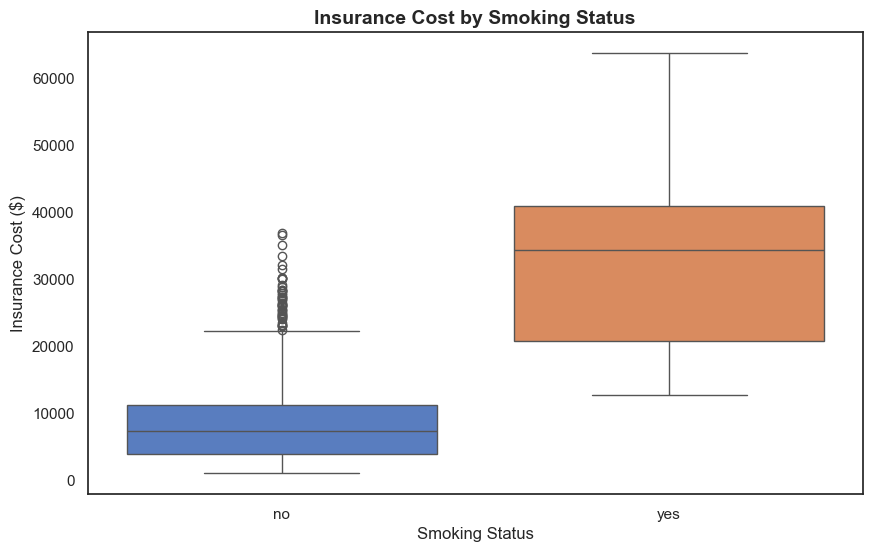

T-test for Insurance Cost Difference Based on Smoking Status
Median cost for smokers: $34456.35
Median cost for non-smokers: $7345.73
Mean Difference: $23609.57
T-statistic: -46.645
p-value: 0.0000


In [ ]:
# EXAMINING THE EFFECT OF SMOKING ON THE RELATIONSHIP BETWEEN AGE AND INSURANCE COST

# Plot smoking status against charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_csv, order=['no', 'yes'], hue=insurance_csv['smoker'], hue_order=['no', 'yes'])
plt.title('Insurance Cost by Smoking Status', fontsize=14, fontweight='bold')
plt.xlabel('Smoking Status')
plt.ylabel('Insurance Cost ($)')
plt.show()

smoker_median_charges = insurance_csv[insurance_csv['smoker'] == 'yes']['charges'].median()
non_smoker_median_charges = insurance_csv[insurance_csv['smoker'] == 'no']['charges'].median()

# Run t-test
no_smoke_charges = insurance_csv[insurance_csv['smoker'] == 'no']['charges']
yes_smoke_charges = insurance_csv[insurance_csv['smoker'] == 'yes']['charges']

t_stat, t_pvalue = ttest_ind(no_smoke_charges, yes_smoke_charges)
mean_diff = yes_smoke_charges.mean() - no_smoke_charges.mean()

print("T-test for Insurance Cost Difference Based on Smoking Status")
print(f"Median cost for smokers: ${smoker_median_charges:.2f}")
print(f"Median cost for non-smokers: ${non_smoker_median_charges:.2f}")
print(f"Mean Difference: ${mean_diff:.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"p-value: {t_pvalue:.4f}")

<Figure size 1000x600 with 0 Axes>

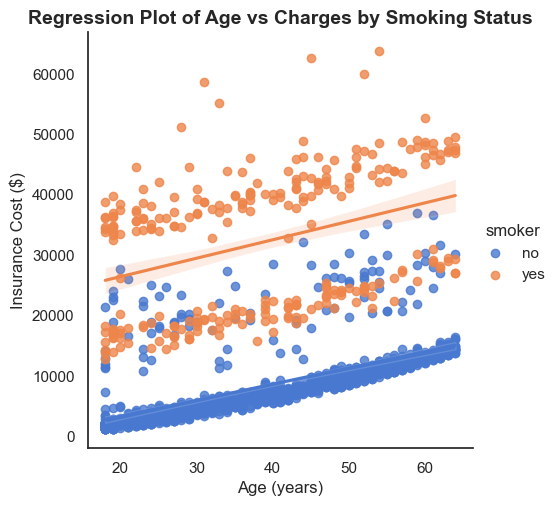

            Metric  Nonsmoker    Smoker
0      Sample Size       1063       274
1   Slope ($/year)     267.12    305.24
2    Intercept ($)   -2085.01  20294.13
3        R-squared      0.394     0.136
4  Correlation (r)      0.627     0.368
5          p-value  2.15e-117  3.18e-10
6   Standard Error      10.18     46.73


In [27]:
# Regression of age vs charges by smoking status
# Divide the data by smoking status
smoker_data = insurance_csv[insurance_csv['smoker'] == 'yes']
nonsmoker_data = insurance_csv[insurance_csv['smoker'] == 'no']

# Fit the model
smoker_model = LinearRegression()
nonsmoker_model = LinearRegression()

smoker_model.fit(smoker_data[['age']], smoker_data['charges'])
nonsmoker_model.fit(nonsmoker_data[['age']], nonsmoker_data['charges'])

smoker_stats = stats.linregress(smoker_data['age'], smoker_data['charges'])
nonsmoker_stats = stats.linregress(nonsmoker_data['age'], nonsmoker_data['charges'])

# Plot
plt.figure(figsize=(10, 6))
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='smoker', hue_order=['no', 'yes'])
plt.title('Regression Plot of Age vs Charges by Smoking Status', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()

# Results table
smoker_results = {
    'Metric': ['Sample Size', 'Slope ($/year)', 'Intercept ($)', 'R-squared', 'Correlation (r)', 'p-value', 'Standard Error'],
    'Nonsmoker': [
        len(nonsmoker_data),
        f"{nonsmoker_stats.slope:.2f}",
        f"{nonsmoker_stats.intercept:.2f}",
        f"{nonsmoker_stats.rvalue**2:.3f}",
        f"{nonsmoker_stats.rvalue:.3f}",
        f"{nonsmoker_stats.pvalue:.2e}",
        f"{nonsmoker_stats.stderr:.2f}"
    ],
    'Smoker': [
        len(smoker_data),
        f"{smoker_stats.slope:.2f}",
        f"{smoker_stats.intercept:.2f}",
        f"{smoker_stats.rvalue**2:.3f}",
        f"{smoker_stats.rvalue:.3f}",
        f"{smoker_stats.pvalue:.2e}",
        f"{smoker_stats.stderr:.2f}"
    ]
}
smoker_results_df = pd.DataFrame(smoker_results)
print(smoker_results_df)

**Key Insights from Analyzing Age v Cost by Smoking Status**

**Smokers**: Smoking increases the average client's insurance cost by $23,609. This is substantial to account for when underwriting insurance policies. However, while the slope of the regression for smokers is $38.12 steeper than for non-smokers, because the standard error is $46.73 we cannot confidently say whether insurance costs increase with age at an increased rate compared to non-smokers. Additionally, the age of smokers only accounts for 13.6% of the variance in insurance cost. This suggests that much of the cost variance seen within smokers cannot be explained by their smoking status alone.

**Non-Smokers**: A strong correlation (r=0.627) and r-squared (62.7%) clearly show that age explains a greater proportion of the variance in insurance cost and has a stronger linear relationship for non-smokers.



**Key Takeaways**

- **Age as a predictor of cost**: Age has a statistically significant postive correlation with insurance cost. However, weak correlation coefficient (r) and r-squared values suggest that multiple interacting variables may influence the relationship between age and insurance cost.
- **Smoking is the greatest cost driver**: Smokers incur much higher average costs than non-smokers, and while age is a statistically significant factor for smokers and non-smokers, its predictive power is substantially stronger for non-smokers than smokers (39.4% v 13.6%, respectively). This highlights the profound impact of smoking on insurance risk and cost variability.
- **BMI category reveals complex cost relationship**: As BMI categories deviated from the "normal" range, there was a clear trend of higher baseline insurance costs. Additionally, the further we deviated the smaller r and r-squared values became, illustrating an increase in cost variance. This trend suggests that other health compications associated with a higher BMI might be more significant cost drivers than age alone outside of the "normal" BMI category.
- **Impact of children on cost**: Clients with children have $1,565.25 higher insurance costs on average than those without children. However, weak r and r-squared values suggest that the relationship between child status and age is a weak predictor of rising insurance costs.
- **Impact of gender on cost**: While gender does account for a significant difference in the average insurance cost, the rate that insurance costs accrued over time was not significantly different between genders. Weak r and r-squared values again suggest that while gender is an important driver of insurance cost, the relationship between gender and age is a poor predictor of increasing insurance costs over time.